## ADVANCED PROJECT: CYLINDER FLOW
This .ipynb contains examples for invocation of the `01_script_cylinder_simulation.py` script, that conducts a simulation of the flow around a circular cylinder.
The code is ported from projects MP1, MP2 and Master’s Thesis of M.Bille. Some of the most prominent features implemented are:
- efficient bounce back boundary conditions (Fullway, Halfway, linear Interpolated) for solid bodies, that allow calculation of force on the solid body by Momentum exchange algorithm (MEA)
- simulation-class that allows:
    - boundaries can be called after the streaming step
    - boundaries can use post-collision populations for their bounce back algorithm (needed for HWBB and IBB algorithm)
- observables: coefficient of lift, coefficient of drag
- reporter: profile reporter for average velocity and reynolds stress profiles
- data-processing and -plotting utilities for the measured observables

### Examples
1. 2D Simulation at Re = 200: periodic vortex shedding behind a circular cylinder, calculation of force coefficients (lift, drag) and Strouhal number
2. 3D Simulation at Re = 3900: turbulent vortex shedding behind a circular cylinder, calculation of average velocity and reynolds stress profiles and comparison to literature

### Usage
The example command line calls and parameters below serve as examples for the use of `01_script_cylinder_simulation.py`. There are lots of parameters available through arguments (see script itself). The "%run" command is used here, to simulate a bash command line call of `python 01_script_cylinder_simulation.py <parameters>`

The script will conduct the simulation and write data to an individually named folder in the directory specified for the `--outdir` parameter. This contains plots, .txt files etc.
The output can be controlled through parameters (see script content (argument parser) itself). Plots etc. are named accordingly in the output data directory.

You might want to output 2D or 3D vtk-data for further analysis and visualization. But beware the amount of storage you might need and set your parameters accordingly (see script parameters and code).

### Note
- Some of the functionalities might not work flawlessly through this .ipynb-implementation (warnings etc.): just use a regular python console or call the script with parameters from a bash script.
- Some functionalities throw a warning, when the flow data con not be processed, because it doesn't meet certain physical characteristics (for example: peak finding in a periodic force coefficient timeseries). This is intended. The errors are captured and forwarded to the output, without crashing the script.
- The command line output of the script (including useful messages) might not appear in the notebook, depending on your configuration of Jupyter. See the .txt-output in the output directory for the full log and output, or execute the script in a python console.

### Example 1:
#### 2D Simulation at Re = 200: periodic vortex shedding behind a circular cylinder, calculation of force coefficients (lift, drag) and Strouhal number
NOTE: these default parameters take approx. 2 min to run on an NVIDIA 2060super

Defaults: `01_script_cylinder_simulation.py --outdir "./datafolder" --char_length_lu 20 --t_target 100 --bbbc_type ibb1 --reynolds_number 200 --domain_height_y_in_d 5 --collision bgk --name 2D_simulation_cylinder_Re200 --mach_number 0.1 --stencil D2Q9`

In [1]:
import os

SCRIPT: Writing arguments to dictionary...
SCRIPT: Input arguments are: 
{'name': '2D_simulation_cylinder_Re200', 'default_device': 'cuda', 'float_dtype': 'float64', 't_sim_max': 259200, 'text_output_only': False, 'no_data': False, 'outdir': './datafolder', 'outdir_data': None, 'reynolds_number': 200.0, 'mach_number': 0.1, 'char_velocity_pu': 1, 'char_length_lu': 20, 'char_length_pu': 1, 'domain_length_x_in_d': None, 'domain_height_y_in_d': 5.0, 'domain_width_z_in_d': None, 'perturb_init': False, 'u_init_condition': 0, 'lateral_walls': 'periodic', 'n_steps': 100000, 't_target': 100.0, 'collision': 'bgk', 'stencil': 'D2Q9', 'eqlm': False, 'bbbc_type': 'ibb1', 'periodic_region_start_relative': None, 'periodic_region_start_pu': None, 'periodic_region_start_lu': None, 'calc_u_profiles': False, 'output_u_profiles_timeseries': False, 'profile_reference_path': '../profile_reference_data/', 'vtk_full_basic': False, 'vtk_full_basic_interval': None, 'vtk_3D': False, 'vtk_3D_fps': None, 'vtk_3D_s

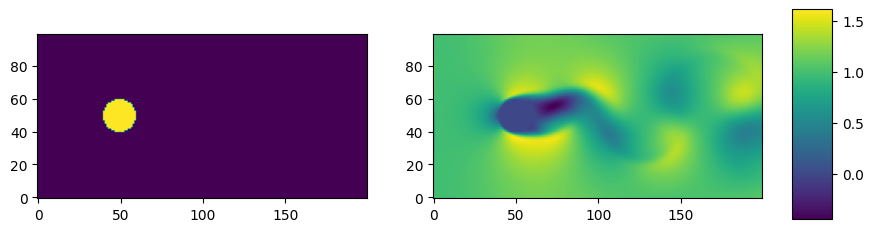

***** SIMULATION FINISHED AT 2025-12-17 17:04:26 *****

### STATS ###
MLUPS: 8.869
simulated PU-Time: 99.99995337498915 seconds
simulated LU-steps:  34641
runtime (WALLTIME) of simulation(num_steps): 78.118 seconds (=  1.3 minutes )

### HARDWARE UTILIZATION ###
current GPU VRAM (MB) usage: 9.747
max. GPU VRAM (MB) usage: 15.871
CPU % avg. over last 1 min, 5 min, 15 min;  2.66 1.05 0.58
current total RAM usage [MB]: 10744.05 of 64219.7 MB

SCRIPT: processing, plotting and saving data...

DRAG STATS:
mean_simple          = 1.693653928340924
mean_periodcorrected = 1.6928978755967055
min_simple           = 1.5952873956700555
max_simple           = 1.7953284200403388
max_mean             = 1.7873442402797335
min_mean             = 1.617481548579985
frequency_fit        = 0.1999999999241945
frequency_fft        = 0.0
fft_resolution       = 0.01999827742257103

LIFT STATS:
mean_simple          = -0.013755539770956112
mean_periodcorrected = -0.0005787575118849577
min_simple           = -0.779

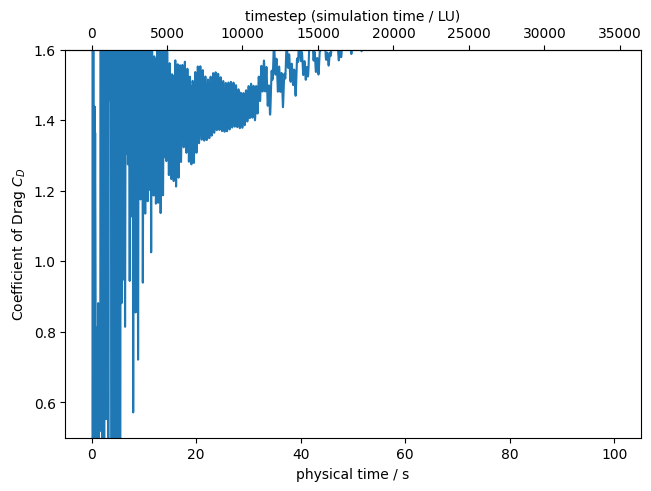

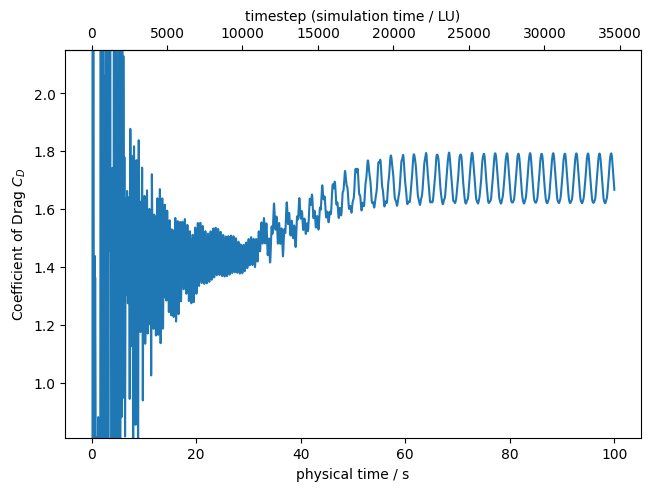

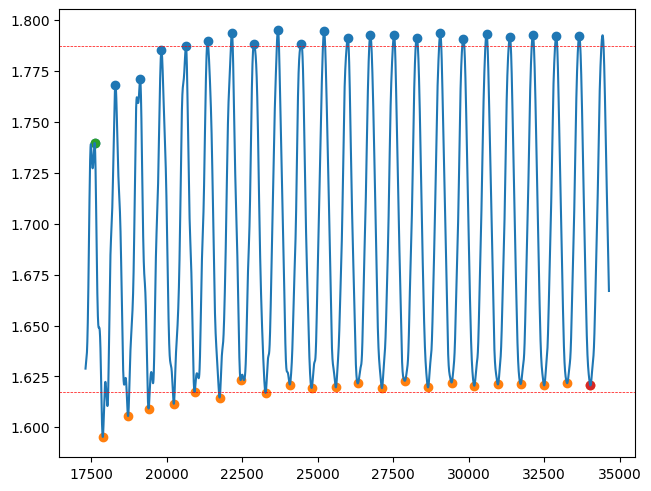

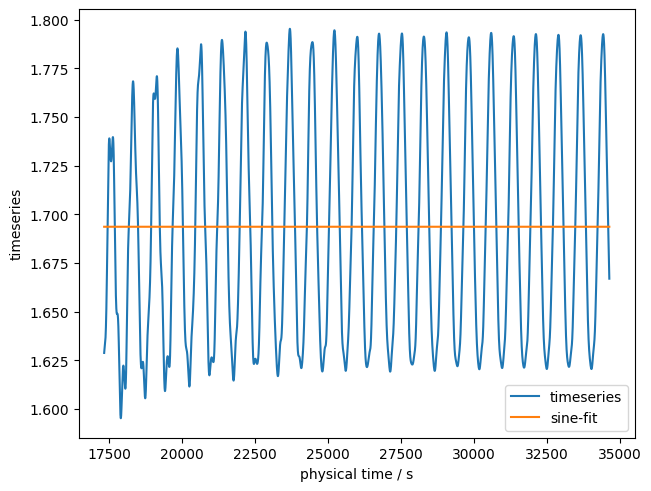

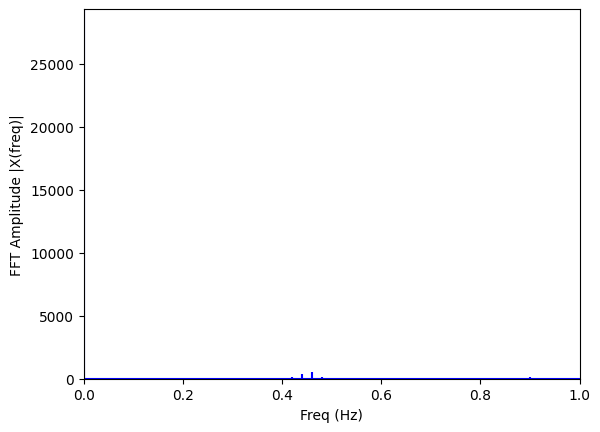

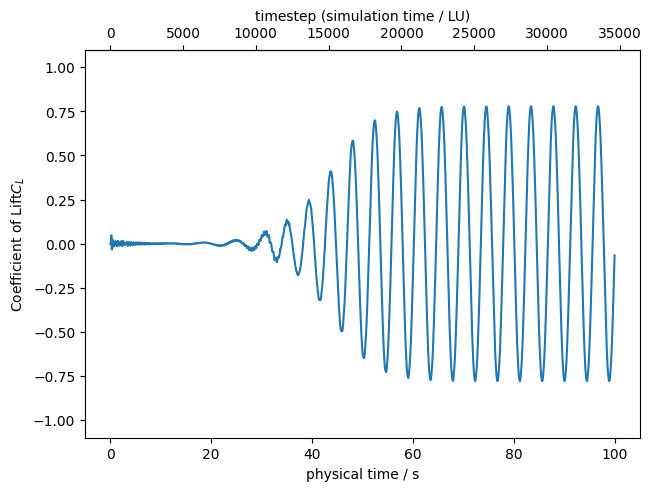

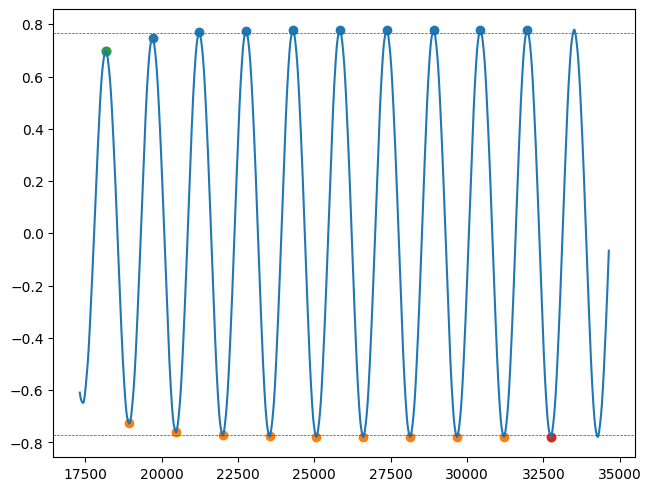

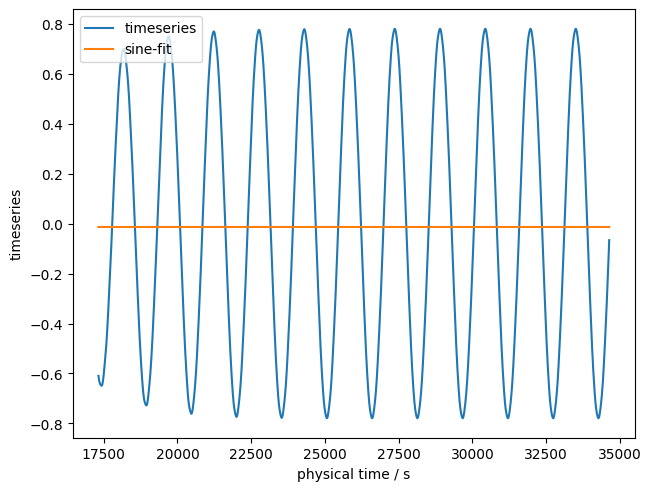

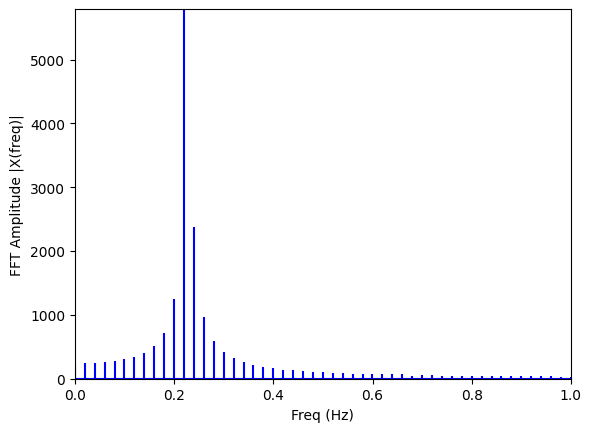

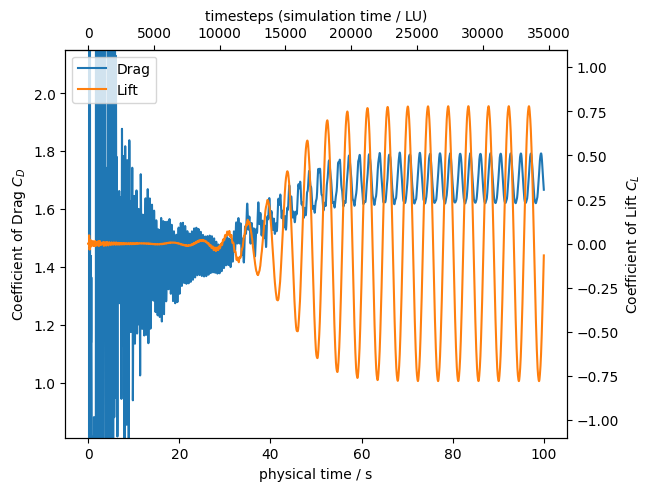

Strouhal number is:  0.20000000029835424

♬ THE END ♬


<Figure size 640x480 with 0 Axes>

In [1]:
%matplotlib inline
%run 01_script_cylinder_simulation.py --outdir "./datafolder" --char_length_lu 20 --t_target 100 --bbbc_type ibb1 --reynolds_number 200 --domain_height_y_in_d 5 --collision bgk --name 2D_simulation_cylinder_Re200 --mach_number 0.1 --stencil D2Q9

### Example 2:
#### 3D Simulation at Re = 3900: turbulent vortex shedding behind a circular cylinder, calculation of average velocity and reynolds stress profiles and comparison to literature
Note: This simulation may take very long  (hours) to finish (reasons: 3D stencil, high Reynolds number,...), depending on your settings

The following settings take 1:30 minutes to run on an RTX 2060super:

`01_script_cylinder_simulation.py --outdir "./datafolder" --char_length_lu 20 --t_target 1 --bbbc_type ibb1 --reynolds_number 3900 --domain_height_y_in_d 5 --domain_width_z_in_d 3 --collision kbc --name 3D_simulation_cylinder_Re3900 --mach_number 0.1 --stencil D3Q27 --calc_u_profiles --profile_reference_path "./profile_reference_data/" --show_u_profiles`

as a showcase to see, if the code works. For physically meaningful data, you need to increase `--t_target` to >10²-10³ seconds...

SCRIPT: Writing arguments to dictionary...
SCRIPT: Input arguments are: 
{'name': '3D_simulation_cylinder_Re3900', 'default_device': 'cuda', 'float_dtype': 'float64', 't_sim_max': 259200, 'text_output_only': False, 'no_data': False, 'outdir': './datafolder', 'outdir_data': None, 'reynolds_number': 3900.0, 'mach_number': 0.1, 'char_velocity_pu': 1, 'char_length_lu': 20, 'char_length_pu': 1, 'domain_length_x_in_d': None, 'domain_height_y_in_d': 5.0, 'domain_width_z_in_d': 3.0, 'perturb_init': False, 'u_init_condition': 0, 'lateral_walls': 'periodic', 'n_steps': 100000, 't_target': 1.0, 'collision': 'kbc', 'stencil': 'D3Q27', 'eqlm': False, 'bbbc_type': 'ibb1', 'periodic_region_start_relative': None, 'periodic_region_start_pu': None, 'periodic_region_start_lu': None, 'calc_u_profiles': True, 'show_u_profiles': True, 'output_u_profiles_timeseries': False, 'profile_reference_path': './profile_reference_data/', 'vtk_full_basic': False, 'vtk_full_basic_interval': None, 'vtk_3D': False, 'vtk_3

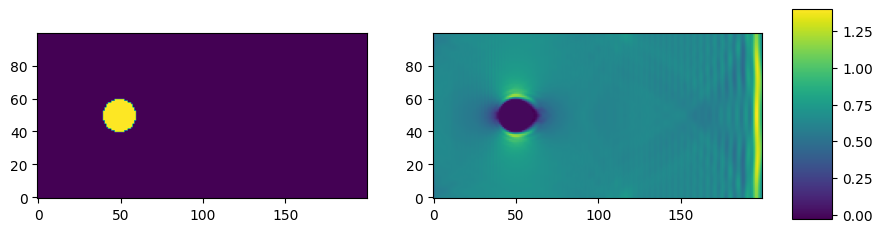

***** SIMULATION FINISHED AT 2025-12-17 17:45:12 *****

### STATS ###
MLUPS: 4.857
simulated PU-Time: 0.9988159656980528 seconds
simulated LU-steps:  346
runtime (WALLTIME) of simulation(num_steps): 85.493 seconds (=  1.42 minutes )

### HARDWARE UTILIZATION ###
current GPU VRAM (MB) usage: 577.019
max. GPU VRAM (MB) usage: 1845.631
CPU % avg. over last 1 min, 5 min, 15 min;  4.18 5.31 5.19
current total RAM usage [MB]: 11127.89 of 64219.7 MB

SCRIPT: processing, plotting and saving data...

(WARNING!) peak finding for drag didn't work... This might just be because there is no converged periodic region!
Analyze Periodic Timeseries (verbose):-> see Python Stack Trace below:

--- Python Stack Trace ---
Traceback (most recent call last):
  File "/home/mbille/lettuce_25/lettuce/examples/advanced_projects/efficient_bounce_back_obstacle/data_processing_and_plotting.py", line 129, in analyze_periodic_timeseries
    if peaks_min[0][0] < peaks_max[0][0]:
       ~~~~~~~~~~~~^^^
IndexError: index

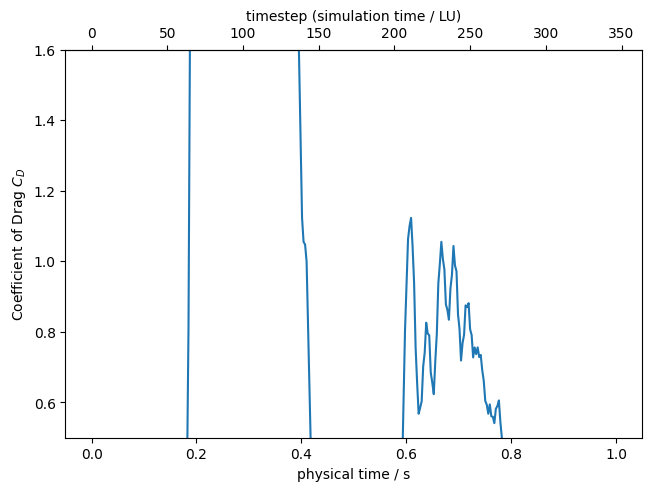

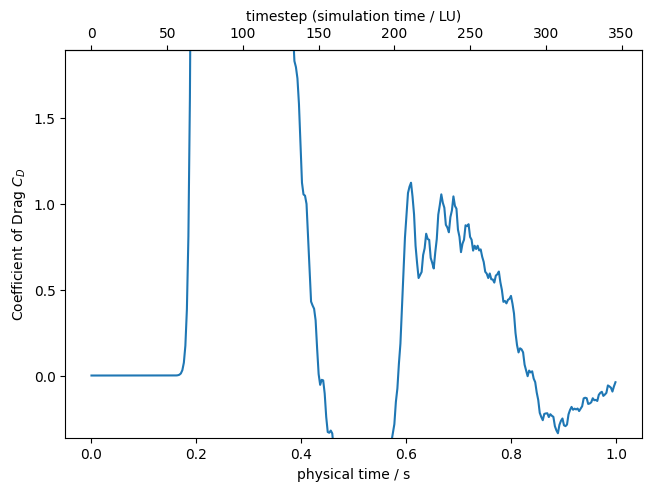

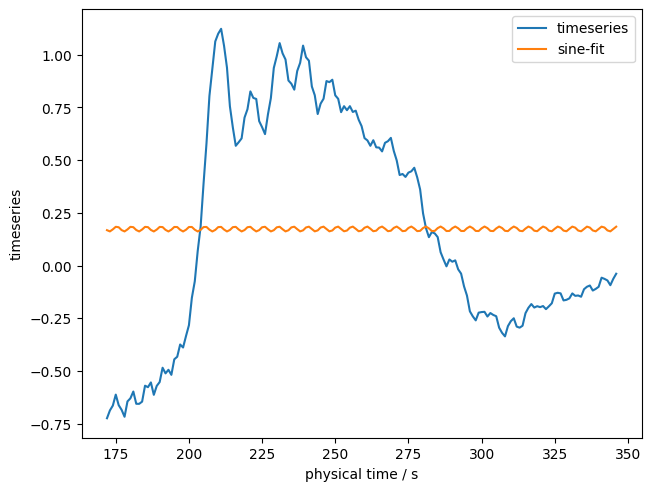

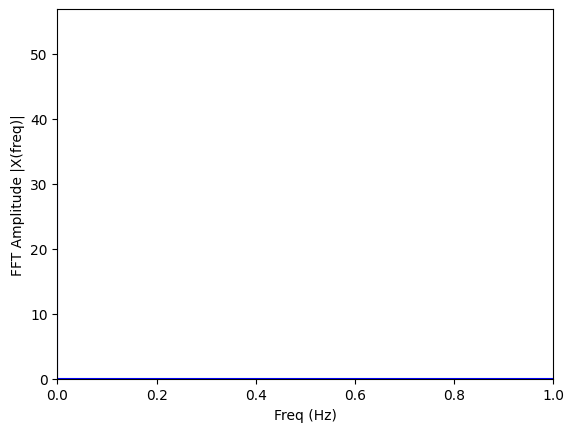

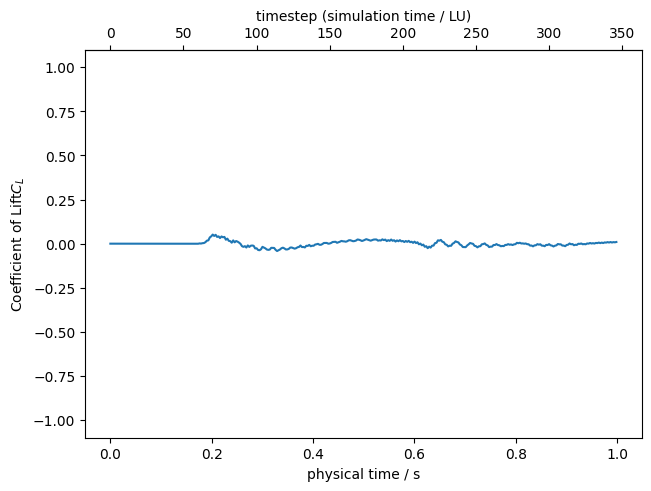

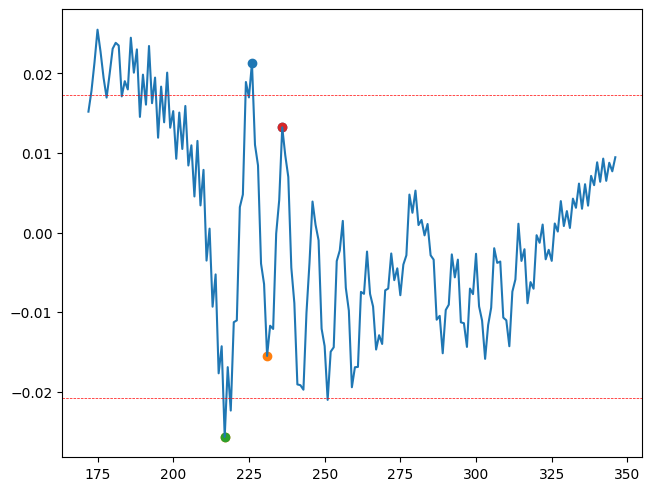

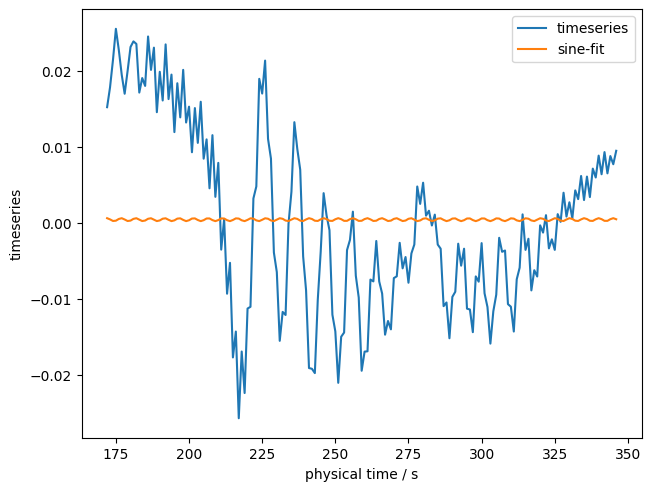

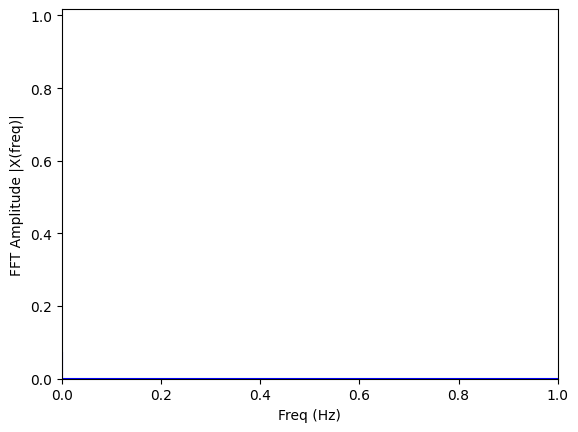

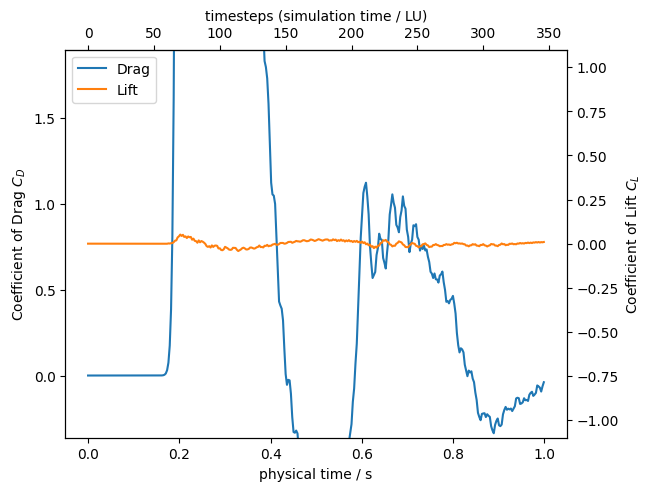

Strouhal number is:  0.202221662229376


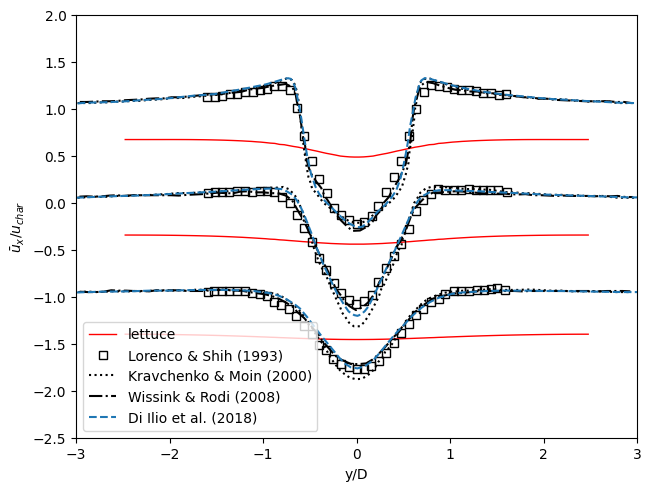

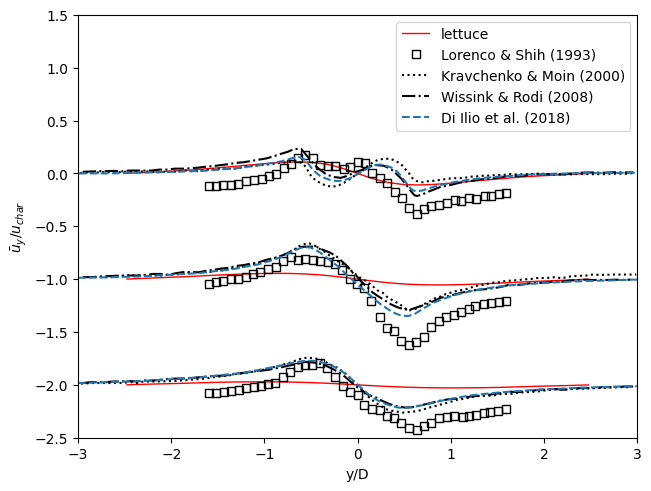

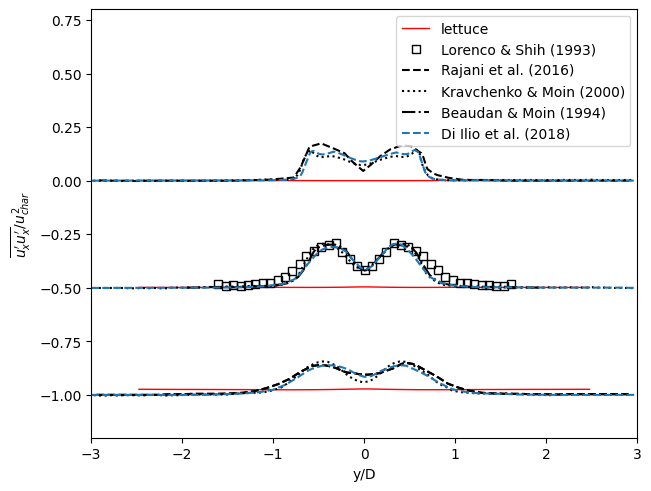

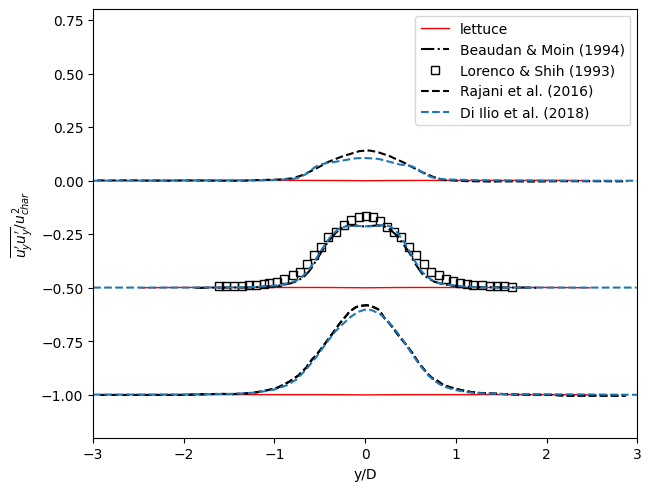

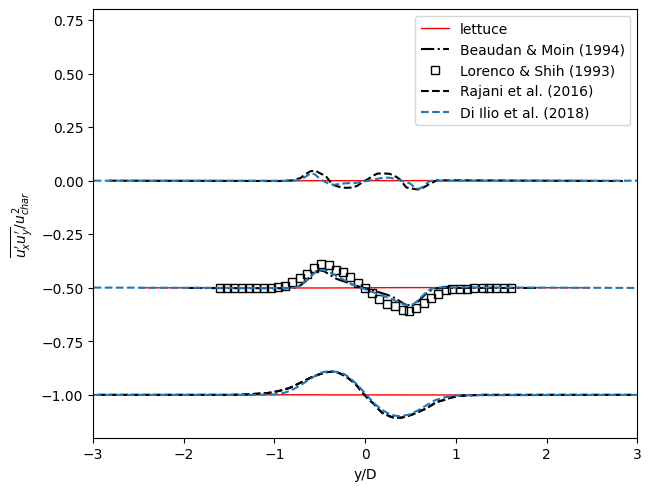


♬ THE END ♬


<Figure size 640x480 with 0 Axes>

In [3]:
%matplotlib inline
%run 01_script_cylinder_simulation.py --outdir "./datafolder" --char_length_lu 20 --t_target 1 --bbbc_type ibb1 --reynolds_number 3900 --domain_height_y_in_d 5 --domain_width_z_in_d 3 --collision kbc --name 3D_simulation_cylinder_Re3900 --mach_number 0.1 --stencil D3Q27 --calc_u_profiles --profile_reference_path "./profile_reference_data/" --show_u_profiles